In [1]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakNet
from nodes.core import layer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = layer()
foldiaklayer = layer()

for i in range(16):
    foldiaklayer.append(FoldiakNode(0.5))
for i in range(8*8):
    inputlayer.append(InputNode(0))
    
network = FoldiakNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_layer_hebbian(inputlayer, foldiaklayer)
network.connect_self_antihebbian(foldiaklayer)

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",1.0/8)
network.setparam("l",10)

In [2]:
import numpy as np
samples = np.loadtxt("../data/lines.csv")

network.setup()

In [3]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))
for i in range(200):
    network.update()

In [4]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

outnum = 5000
innum = 5
count = 0

for i in range(outnum):
    for j in range(len(inputlayer.nodes)):
        inputlayer.nodes[j].setvalstored(samples[i,j])
    for j in range(innum):
        network.update()
    count += innum
    if ((count%1000)==0):
        print(str(count)+"/"+str(innum*outnum))

1000/25000
2000/25000
3000/25000
4000/25000
5000/25000
6000/25000
7000/25000
8000/25000
9000/25000
10000/25000
11000/25000
12000/25000
13000/25000
14000/25000
15000/25000
16000/25000
17000/25000
18000/25000
19000/25000
20000/25000
21000/25000
22000/25000
23000/25000
24000/25000
25000/25000


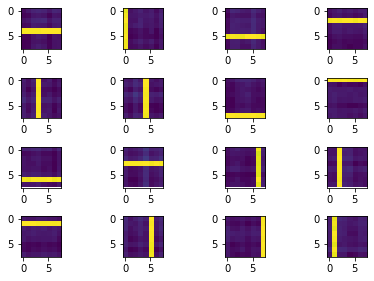

In [27]:
fig=plt.figure()

for node_num in range(16):

    testbias = []

    for node in inputlayer.nodes:
        for i in network.connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(4,4,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((8,8)))
fig.tight_layout()
plt.show()

Lines:
======

As far as I can tell, the algorithm appears to be correctly learning the lines, as seen above. Each node in the foldiak layer has strong biases on a different line. This means that if, for instance, 4 down, 3 down, and 4 across were on, then the correct nodes would be on in the network.

More importantly, this means that I have correctly reproduced the algorithm from the paper, as these are the results that I would expect from that algorithim.

Stuff to do next:
 * Add noise to the dataset
 * Make the input dataset higher resolution (with more noise)
 * Something I've been meaning to try: what if I stack more than one layer of foldiak nodes?
 * More performance tweaks; I would like to parallel process multiple samples at once, which shouldn't be too complicated with proper threading.

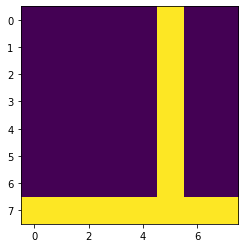

In [29]:
plt.imshow(samples[1,:].reshape((8,8)))
plt.show()

In [32]:
for i in range(8*8):
    inputlayer.nodes[i].setvalstored(samples[1,i])
network.update()
output = []
for i in foldiaklayer.nodes:
    output.append(i.returnval())
output

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]